# Stocks

## Libraries

In [2]:
#Basics
import pandas as pd
import numpy as np
import datetime
from datetime import date,datetime

#Getting data

import pandas_datareader as pdr
from pandas_datareader import data
import pandas_datareader.data as web
import yfinance as yf

#Plotting
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
from matplotlib import style

## Getting data

In [3]:
# Functions
def get_yah(tickers, startdate, enddate):
    data = yf.download(tickers, start=startdate, end=enddate)
    data.reset_index(inplace=True)
    data.set_index("Date", inplace=True)
    #     data = data.drop("Ticker", axis=1)
    #     data.to_csv(data)

    return data


def get_web(ticker, start, end):
    df = web.DataReader(ticker, 'yahoo', start, end)
    return df

In [5]:
start_date = '2017-01-01'
end_date = datetime.now()
ticker = ['GOOGL']
# ticker = ['GOOGL','MSFT']
df=get_yah(ticker[0],start_date,end_date)
# print(df.head())

[*********************100%***********************]  1 of 1 completed


## Pandas basic ops

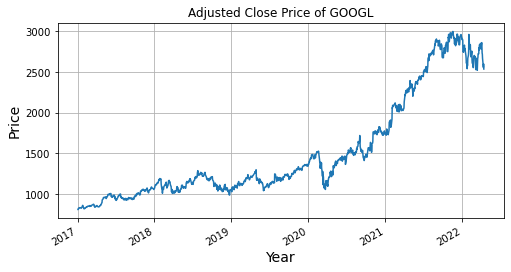

In [6]:
#With matplotlib:
plt.figure(figsize=(8,4))
df['Adj Close'].plot()
plt.title(f'Adjusted Close Price of {ticker[0]}')
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which='major')

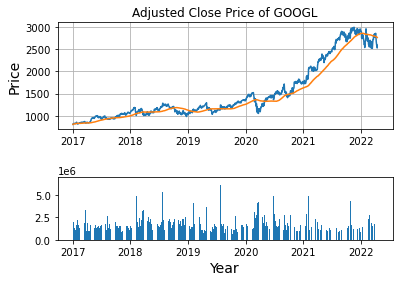

In [24]:
df["100ma"]=df["Adj Close"].rolling(window=100,min_periods=0).mean()
df.dropna(inplace=True) #not needed by min_periods

ax1 = plt.subplot2grid((10,5), (0,0), rowspan=5, colspan=6)

plt.title(f'Adjusted Close Price of {ticker[0]}')
plt.ylabel('Price', fontsize=14)
plt.grid(which='major')

ax2 = plt.subplot2grid((10,5), (7,0), rowspan=5, colspan=6,sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])


ax2.bar(df.index, df['Volume'])

plt.xlabel('Year', fontsize=14)


plt.show()

In [ ]:
# Use mplfinance to plot candle data with ohlc

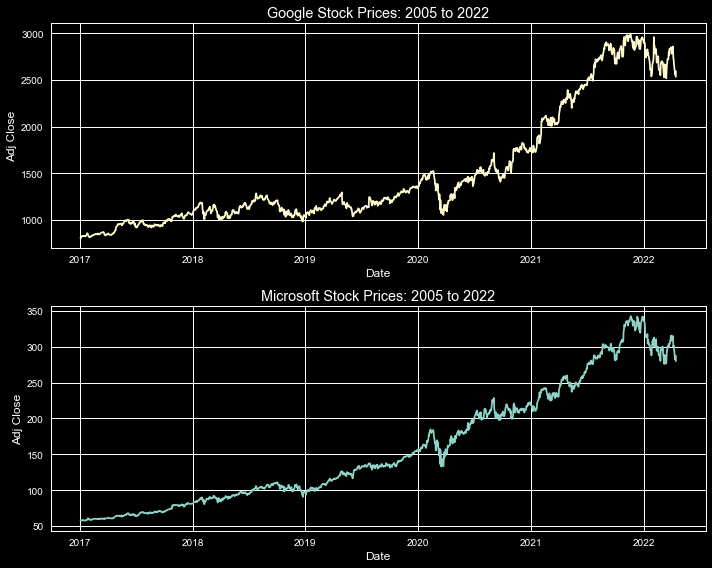

In [65]:
#Seaborn
# We will use data from Google and Microsoft in our analysis
ticker=["GOOGL","MSFT"]
google= get_web(ticker[0], start_date, end_date)
microsoft= get_web(ticker[1], start_date, end_date)

goog_close= google.drop(google.columns[0:5], axis=1)
msft_close= microsoft.drop(microsoft.columns[0:5], axis=1)

# Adjusting the style 
style.use('dark_background')
plt.figure(figsize=(10,8))
# on the subplot, we define how many rows and columns our figure will have)
plt.subplot(2, 1, 1)
ax1=sns.lineplot(x=goog_close.index, y= goog_close['Adj Close'], color= 'lemonchiffon')
plt.title('Google Stock Prices: 2005 to 2022')
plt.subplot(2, 1, 2)
ax2= sns.lineplot(x=msft_close.index, y=msft_close['Adj Close'])
plt.title('Microsoft Stock Prices: 2005 to 2022')
plt.tight_layout()



# New heading

# Technical indicators

## Libraries

In [13]:
import ta
import pandas_ta as pta
from finta import TA

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]


### Notes

https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html?highlight=indicator_bb#examples

## Bollinger bands

[*********************100%***********************]  1 of 1 completed


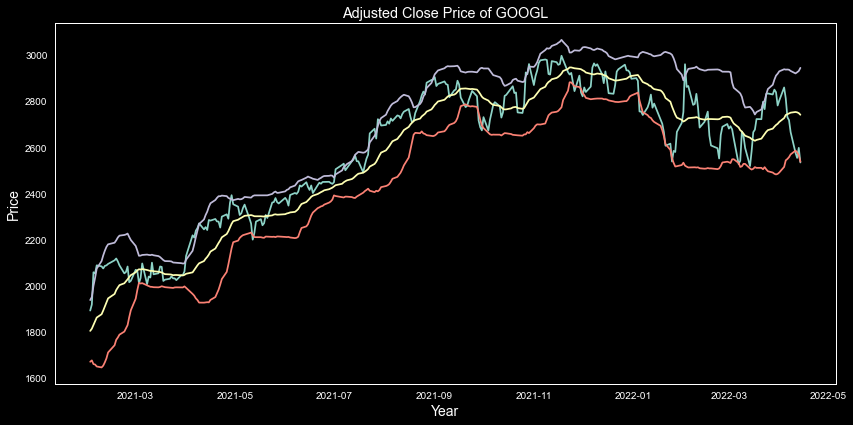

In [76]:
from ta.utils import dropna
from ta.volatility import BollingerBands


# Load datas
df=get(ticker[0],start_date,end_date)

# Clean NaN values
df = dropna(df)

# # Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# # Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# # Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# # Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

# # Add Width Size Bollinger Bands
df['bb_bbw'] = indicator_bb.bollinger_wband()

# # Add Percentage Bollinger Bands
df['bb_bbp'] = indicator_bb.bollinger_pband()

df.dropna(inplace=True) #not needed by min_periods

# df.tail()

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df.index, df['Adj Close'])

ax1.plot(df.index, df['bb_bbm'])
ax1.plot(df.index, df['bb_bbh'])
ax1.plot(df.index, df['bb_bbl'])

# # ax1.plot(df.index, df['100ma'])

plt.title(f'Adjusted Close Price of {ticker[0]}')
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which='major')
plt.show()

In [ ]:

# add all available TA indicators
ta_all_indicators_df = ta.add_all_ta_features(df, open="Open", high="High", 
                                              low="Low", close="Close", 
                                              volume="Volume")
ta_all_indicators_df.shape
view rawta_6.py hosted with ❤ by GitHub

# add Bollinger Bands low/high indicator
ta_df["bb_high_ind"] = ta_bbands.bollinger_hband_indicator()
ta_df["bb_low_ind"] = ta_bbands.bollinger_lband_indicator()

# add additional measures
ta_df["bb_width"] = ta_bbands.bollinger_wband()
ta_df["bb_pct"] = ta_bbands.bollinger_pband()

# instantiate the indicator
ta_bbands = ta.volatility.BollingerBands(close=df["Adj Close"], 
                                         window=20, 
                                         window_dev=2)

# copy as we will be adding to it temporarily
ta_df = df.copy()

# add Bollinger Bands
ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()

ta_df[["bb_low", "bb_ma", "bb_high"]].plot(title="Bolinger Bands (ta)");


## RSI

In [ ]:
from ta.momentum import RSIIndicator
from ta.momentum import awesome_oscillator

## MACD

In [ ]:
from ta.trend import MACD